# Titanic Survival Prediction

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not

# About the DataSet

We are using the Titanic Dataset here. It contains both numerical and string values.

## The predefined columns are -

`Passenger ID` - To identify unique passengers

`Survived` - If they survived or not

`P Class` - The class passengers travelled in

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

`Name` - Passenger Name

`Sex` - Gender of Passenger

`Age` - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp` - Number of siblings or spouse

`Parch` - Parent or child

`Ticket` - Ticket number

`Fare` - Amount paid for the ticket

`Cabin` - Cabin of residence

`Embarked` - Point of embarkmen


##  Importing the necessary libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\TUFAN\Downloads\codsoft\Titanic_Survival_Detection\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## shape of the dataframe

In [7]:
df.shape

(891, 12)

## Information about the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for null/missing values in the dataset

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Observation & Inference:`
- There are 177 null values in the age column,687 in Cabin, 2 in Embarked
- since the cabin column is not of much use and contains a lot of null values so we will drop it.


## Dropping unnecessary columns

In [11]:
df.drop(columns="Cabin",axis=1,inplace=True)

## Filling the missing values of the age column by Mean value of the column

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

## Filling the missing values of the Embarked column by Mode value of the column

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

`Observation & Inference:`
- All the missing values are treated


## Checking for duplicate values in the dataset

In [16]:
df.duplicated().sum()

0

`Observation & Inference:`
- No duplicate records are present


## Checking the survival of people

In [17]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Visualization of people survived from different passenger class

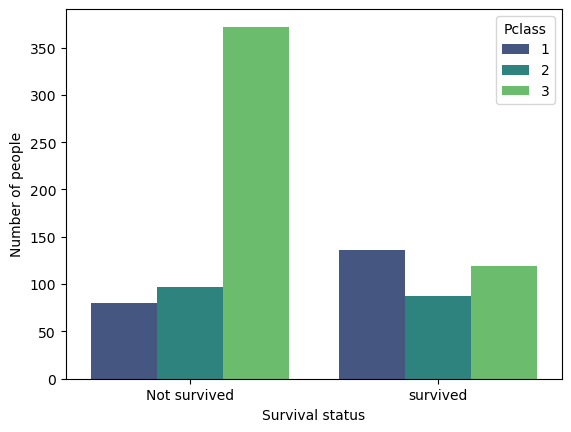

In [20]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

`Observation:`
- Most people didn't survive
- people from class 3 had the least survival rate, whereas people from class 1 had the highest survival rate

## Visualization of people survived from different gender

In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

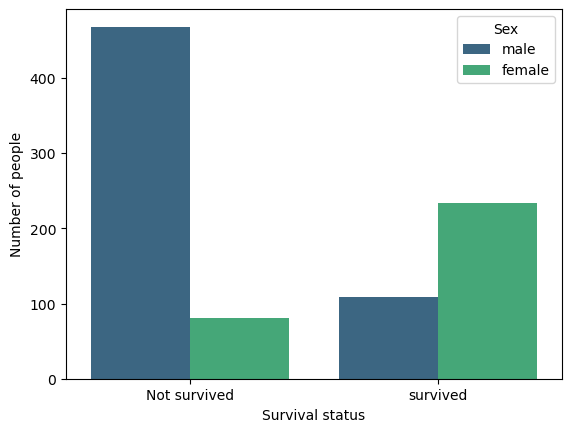

In [23]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

`Observation:`
- Survival rate was female was higher in comparison to male

## visualizing the population of male and female passenger

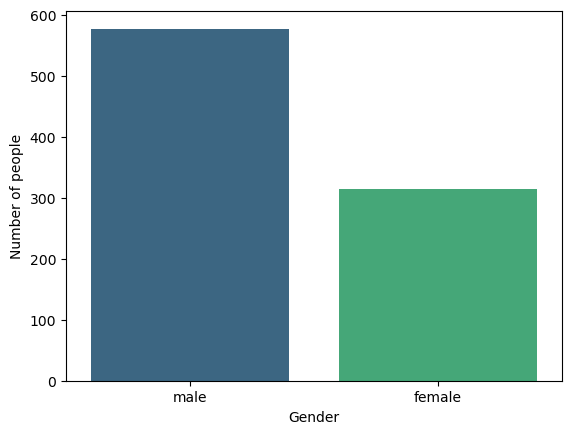

In [24]:
sns.countplot(x='Sex',data=df,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

## visualizing the population of different passenger class

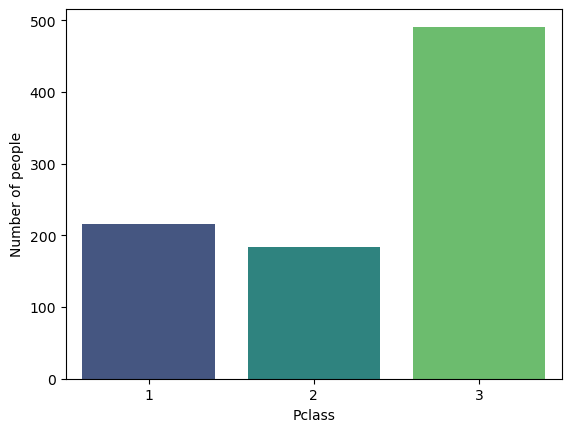

In [25]:
sns.countplot(x='Pclass',data=df,palette='viridis',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## changing the Sex column and Embarked column from categorical to numerical for model training

In [28]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [38]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


## Checking the correlation of survival with other columns using heat map

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 73.2+ KB


In [44]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

In [45]:
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,1,3,0,0
1,71.2833,0,1,38.000000,0,1,1,1
2,7.9250,0,0,26.000000,0,3,0,1
3,53.1000,0,1,35.000000,0,1,0,1
4,8.0500,0,0,35.000000,1,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,1,2,0,0
887,30.0000,0,0,19.000000,0,1,0,1
888,23.4500,2,1,29.699118,0,3,0,0
889,30.0000,0,0,26.000000,1,1,1,1


<Axes: >

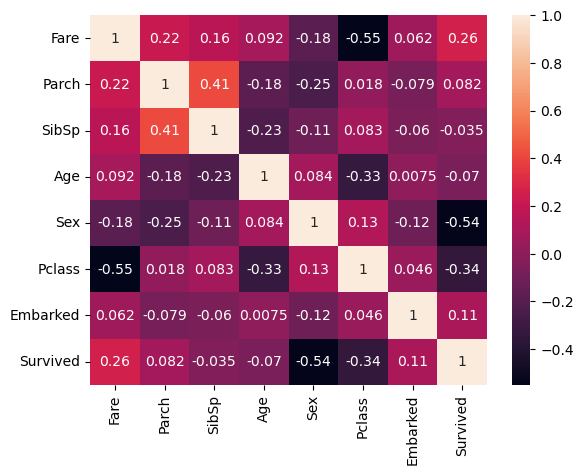

In [46]:
sns.heatmap(df_num.corr(),annot=True)

`Observation:`
- Fare, sex, Pclass, Embarked has correlation with survived column

In [52]:
#Features
x = df_num.drop(columns=(['Parch','SibSp','Age','Survived']))

In [53]:
x

,Fare,Sex,Pclass,Embarked
0,7.2500,1,3,0
1,71.2833,0,1,1
2,7.9250,0,3,0
3,53.1000,0,1,0
4,8.0500,1,3,0
...,...,...,...,...
886,13.0000,1,2,0
887,30.0000,0,1,0
888,23.4500,0,3,0
889,30.0000,1,1,1


In [54]:
# Target
y = df['Survived']

In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [59]:
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
x_train_prediction=model.predict(x_train)

In [64]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [68]:
train_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [69]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  0.7921348314606742


In [70]:
x_test_prediction=model.predict(x_test)

In [71]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [72]:

print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 0.7597765363128491


# `Conclusion:`

- Here I have used Logistic Regression Model for prediction.
- Accuracy Score of train data is 79%
- Accuracy score of test data is 76%
- The model performs slightly better on the training data than on the testing data. This suggests that there may be some degree of overfitting, where the model fits too closely to the training data and does not generalize well to unseen data.
- The model performs slightly better on the training data than on the testing data. This suggests that there may be some degree of overfitting, where the model fits too closely to the training data and does not generalize well to unseen data.